In [1]:
# Parameters
param_dict = {
  "cave": {
    "crop": {
      "top_left": {
        "x": 180,
        "y": 90
      },
      "bottom_right": {
        "x": 330,
        "y": 280
      }
    },
    "center": {
      "x": 72,
      "y": 100
    },
    "curve": {
      "x": 131,
      "y": 180,
    },
    "start": {
      "angle": 144.5,
      "value": 0.4
    },
    "end": {
      "angle": 404,
      "value": 10
    },

    "number_of_shape_countours_threshold": 150,
    "threshold_value": 90,
    "threshold_brightness": 255,
    "minLineLength": 40,
    "maxLineGap": 1
  },
  "water": {
    "crop": {
      "top_left": {
        "x": 100,
        "y": 100
      },
      "bottom_right": {
        "x": 600,
        "y": 600
      }
    },
    "center": {
      "x": 248,
      "y": 330
    },
    "curve": {
      "x": 430,
      "y": 430,
    },
    "start": {
      "angle": 223,
      "value": 100
    },
    "end": {
      "angle": 316,
      "value": 250
    },

    "number_of_shape_countours_threshold": 150,
    "threshold_value": 60,
    "threshold_brightness": 20,
    "threashold_reverse": True,
    "minLineLength": 170,
    "maxLineGap": 30
  },
  "gauge_1": {
    "crop": {
      "top_left": {
        "x": 50,
        "y": 50
      },
      "bottom_right": {
        "x": 650,
        "y": 650
      }
    },
    "center": {
      "x": 295,
      "y": 305
    },
    "curve": {
      "x": 500,
      "y": 500,
    },
    "start": {
      "angle": 135,
      "value": 0
    },
    "end": {
      "angle": 406,
      "value": 1000
    },

    "number_of_shape_countours_threshold": 150,
    "threshold_value": 190,
    "threshold_brightness": 130,
    "minLineLength": 90,
    "maxLineGap": 0
  },
}

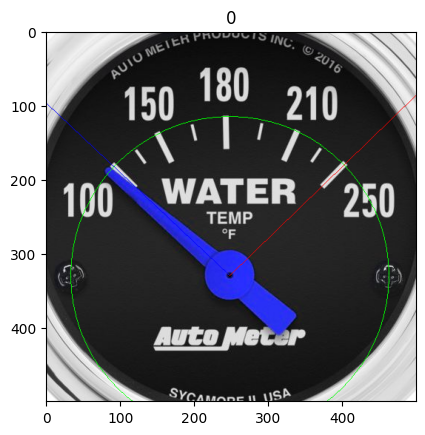

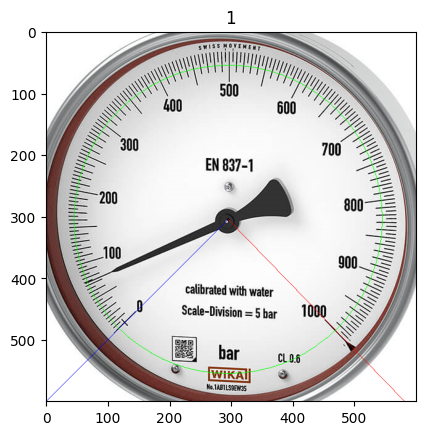

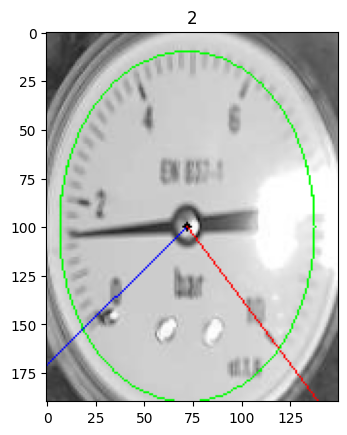

Type: water
Params: {'crop': {'top_left': {'x': 100, 'y': 100}, 'bottom_right': {'x': 600, 'y': 600}}, 'center': {'x': 248, 'y': 330}, 'curve': {'x': 430, 'y': 430}, 'start': {'angle': 223, 'value': 100}, 'end': {'angle': 316, 'value': 250}, 'number_of_shape_countours_threshold': 150, 'threshold_value': 60, 'threshold_brightness': 20, 'threashold_reverse': True, 'minLineLength': 170, 'maxLineGap': 30}
Type: gauge_1
Params: {'crop': {'top_left': {'x': 50, 'y': 50}, 'bottom_right': {'x': 650, 'y': 650}}, 'center': {'x': 295, 'y': 305}, 'curve': {'x': 500, 'y': 500}, 'start': {'angle': 135, 'value': 0}, 'end': {'angle': 406, 'value': 1000}, 'number_of_shape_countours_threshold': 150, 'threshold_value': 190, 'threshold_brightness': 130, 'minLineLength': 90, 'maxLineGap': 0}
Type: cave
Params: {'crop': {'top_left': {'x': 180, 'y': 90}, 'bottom_right': {'x': 330, 'y': 280}}, 'center': {'x': 72, 'y': 100}, 'curve': {'x': 131, 'y': 180}, 'start': {'angle': 144.5, 'value': 0.4}, 'end': {'angle'

In [2]:
from matplotlib import pyplot as plt
import cv2
import glob
import re
import numpy as np

# List all images with name image{X}.png
image_files = glob.glob('image_*_main.*')

# Load all images using cv2
images = [cv2.imread(image_file) for image_file in image_files]

# Extract the type part from the file name
type_pattern = re.compile(r'image_(.*?)_main\..*')
types = [type_pattern.search(file).group(1) for file in image_files]

ellipses = []

for i in range(len(images)):
  params = param_dict.get(types[i], None)

  ellipses.append(None)

  if params is None:
    continue

  
  crop_data = params.get("crop")
  top_left = (crop_data.get("top_left").get("x"), crop_data.get("top_left").get("y"))
  bottom_right = (crop_data.get("bottom_right").get("x"), crop_data.get("bottom_right").get("y"))
  
  images[i] = images[i][top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

  cp = images[i].copy()

  # Draw the center from params "center"
  center = (params.get("center").get("x"), params.get("center").get("y"))
  curve = (params.get("curve").get("x"), params.get("curve").get("y"))
  cv2.circle(cp, center, 2, (0,0,0), -1)

  # Draw the start point from params "start"
  # start = (params.get("start").get("x"), params.get("start").get("y"))
  start_angle = params.get("start").get("angle")
  start_angle_rad = np.radians(start_angle)
  start = (int(center[0] + curve[0] * np.cos(start_angle_rad)), int(center[1] + curve[1] * np.sin(start_angle_rad)))
  cv2.line(cp, center, start, (0, 0, 255), 1)

   # Draw the end point from params "end"
  # end = (params.get("end").get("x"), params.get("end").get("y"))
  end_angle = params.get("end").get("angle")
  end_angle_rad = np.radians(end_angle)
  end = (int(center[0] + curve[0] * np.cos(end_angle_rad)), int(center[1] + curve[1] * np.sin(end_angle_rad)))
  cv2.line(cp, center, end, (255, 0, 0), 1)

  ellipse = (center, (params.get("curve").get("x"), params.get("curve").get("y")), 0)
  ellipses[i] = ellipse

  cv2.ellipse(cp, ellipse, (0, 255, 0), 1)

  plt.imshow(cp)
  plt.title(i)
  plt.show()

for i in range(len(images)):
  print("Type:", types[i])
  print("Params:", param_dict.get(types[i], None))


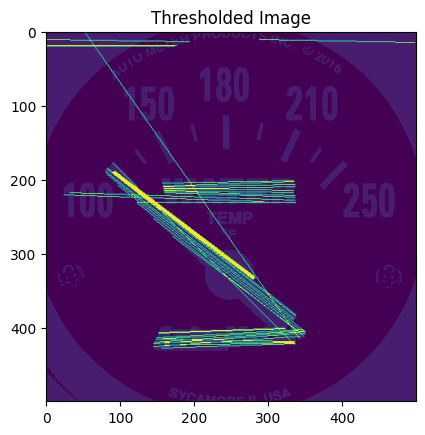

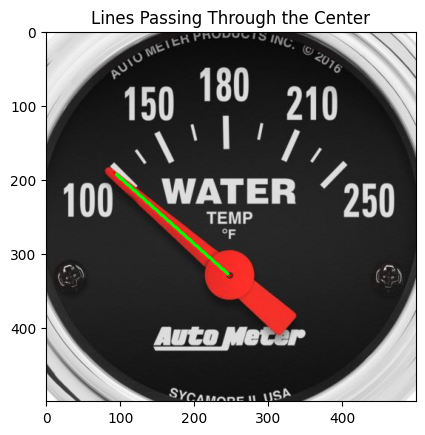

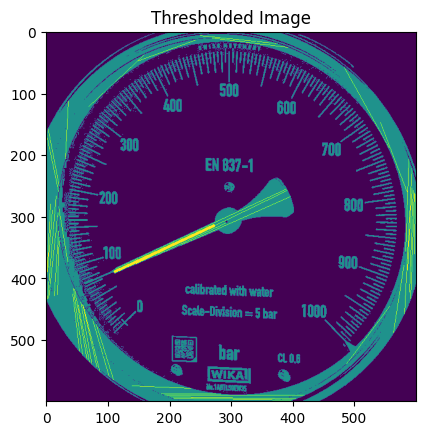

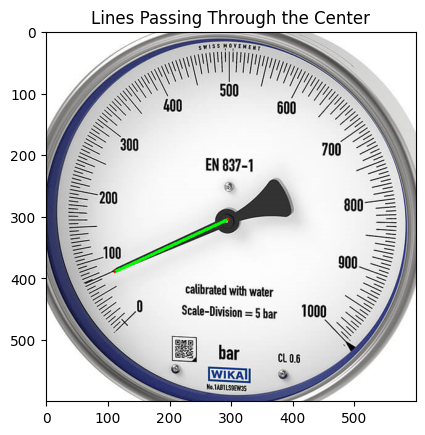

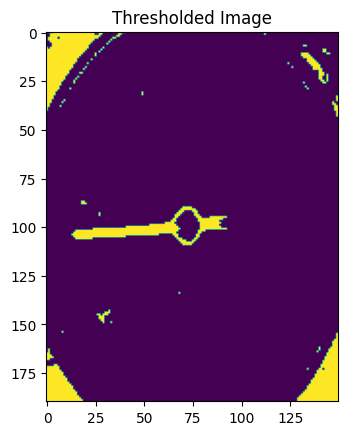

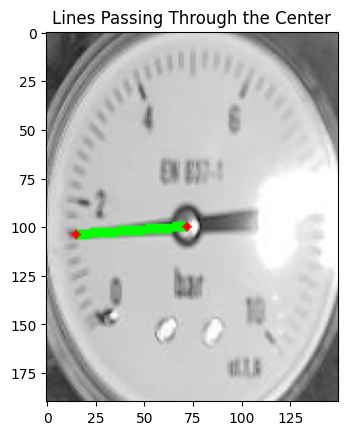

In [3]:

import lib.helpers as helpers

needle_points = []
for a in range(len(images)):
  params = param_dict.get(types[a], None)
  needle_points.append(None)
  ellipse = ellipses[a]

  if ellipse is None:
    continue

  needle_point, filtered_lines, all, dst2 = helpers.find_needle(images[a], ellipse, params.get("threshold_value"), params.get("threshold_brightness"), params.get("minLineLength"), params.get("maxLineGap"), params.get("threashold_reverse"))

  thresh = dst2.copy()
  render_needle = images[a].copy()

  if not needle_point is None:
    needle_points[a] = needle_point
     # Draw the lines on the ROI
    cv2.line(render_needle, needle_point, ellipse[0], (0, 255, 0), 3)

    # Draw the furthest point on the ROI
    cv2.circle(render_needle, needle_point, 2, (0, 0, 255), -1)

    # Draw the center of the ROI
    cv2.circle(render_needle, ellipse[0], 2, (0, 0, 255), -1)


  # Draw all the filtered lines on the ROI
  for line in all:
    x1, y1, x2, y2 = line[0]
    cv2.line(thresh, (x1, y1), (x2, y2), (255, 0, 0), 1)

  # Draw all the filtered lines on the ROI
  for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(thresh, (x1, y1), (x2, y2), (255, 0, 255), 3)

 
  # Display the image dst2
  plt.imshow(thresh)
  plt.title('Thresholded Image')
  plt.show()

  # Display the image with lines
  plt.imshow(cv2.cvtColor(render_needle, cv2.COLOR_BGR2RGB))
  plt.title('Lines Passing Through the Center')
  plt.show()

Files matching pattern 'image_water_*': ['image_water_main.jpg']
start 3.8920842319473548 end 5.515240436302081 needle -2.4137579446337205
distance -6.305842176581075 ignored 4.6600291028248595 ratio -3.8849262687492954 gauge size 1.6231562043547263
Value -482.73894031239433
316 5.515240436302081 223 3.8920842319473548


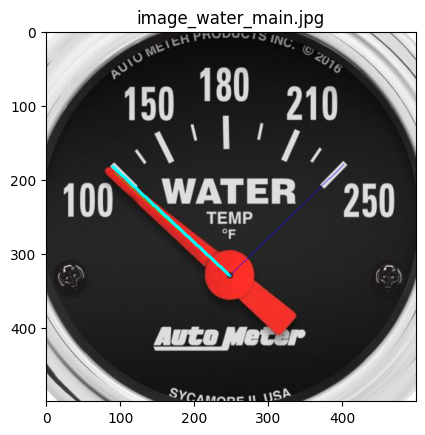

Files matching pattern 'image_gauge_1_*': ['image_gauge_1_main.png']
start 2.356194490192345 end 7.086036763096978 needle 2.7088402880949207
distance 0.3526457979025759 ignored 1.5533430342749526 ratio 0.07455762318391505 gauge size 4.729842272904633
Value 74.55762318391506
406 7.086036763096978 135 2.356194490192345


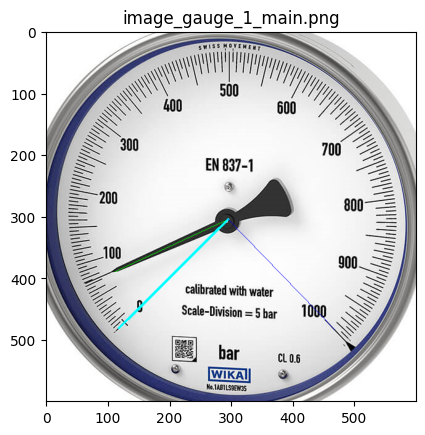

Files matching pattern 'image_cave_*': ['image_cave_1.png', 'image_cave_main.png']
start 2.522000769131806 end 7.051130178057091 needle 3.125200679281788
distance 0.6031999101499821 ignored 1.7540558982543004 ratio 0.1331823084942753 gauge size 4.529129408925286
Value 1.6785501615450427
404 7.051130178057091 144.5 2.522000769131806


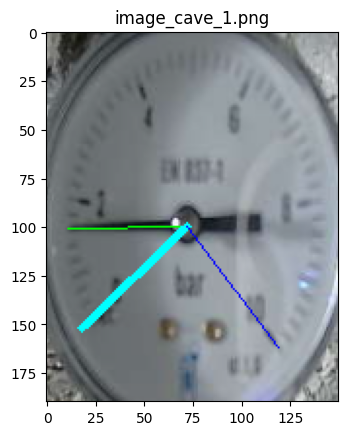

start 2.522000769131806 end 7.051130178057091 needle 3.0715320709513376
distance 0.5495313018195316 ignored 1.7540558982543004 ratio 0.12133265627972628 gauge size 4.529129408925286
Value 1.5647935002853721
404 7.051130178057091 144.5 2.522000769131806


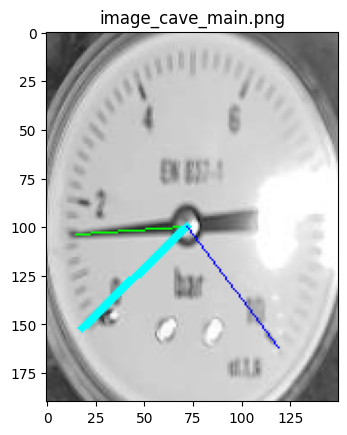

In [4]:
import numpy as np

# Look for files matching the pattern "image_{type}_{x}.png"
for a in range(len(images)):
  pattern = f'image_{types[a]}_*'
  matching_files = glob.glob(pattern)
  params = param_dict.get(types[a], None)
  
  print(f"Files matching pattern '{pattern}': {matching_files}")

  # Load each matching image using cv2
  for file in matching_files:
    image = cv2.imread(file)

    ellipse = ellipses[a]

    if ellipse is None or params is None:
      continue

    start_angle = params.get("start").get("angle")
    end_angle = params.get("end").get("angle")

    center = ellipse[0]
    radius_x = ellipse[1][0] / 2
    radius_y = ellipse[1][1] / 2

    crop_data = params.get("crop")
    top_left = (crop_data.get("top_left").get("x"), crop_data.get("top_left").get("y"))
    bottom_right = (crop_data.get("bottom_right").get("x"), crop_data.get("bottom_right").get("y"))
    
    cropped = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]].copy()

    needle, filtered, all, _ = helpers.find_needle(cropped, ellipse, params.get("threshold_value"), params.get("threshold_brightness"), params.get("minLineLength"), params.get("maxLineGap"), params.get("threashold_reverse"))

    if not needle is None:
      needle_angle_rad = np.arctan2(needle[1] - ellipse[0][1], needle[0] - ellipse[0][0])
      needle_angle = np.degrees(needle_angle_rad)

      gauge_value = helpers.calculate_gauge_value(ellipse, needle_angle, start_angle, end_angle, params.get("start").get("value"), params.get("end").get("value"))

      print("Value", gauge_value)

      # Draw the needle on the cropped image
      cv2.line(cropped, needle, ellipse[0], (0, 255, 0), 1)
    else:
      print("No needle found")

    # Display result
    start_angle_rad = np.deg2rad(start_angle)
    start_x = center[0] + radius_x * np.cos(start_angle_rad)
    start_y = center[1] + radius_y * np.sin(start_angle_rad)
    start = (int(start_x), int(start_y))

    end_angle_rad = np.deg2rad(end_angle)
    end_x = center[0] + radius_x * np.cos(end_angle_rad)
    end_y = center[1] + radius_y * np.sin(end_angle_rad)
    end = (int(end_x), int(end_y))

    print(end_angle, end_angle_rad, start_angle, start_angle_rad)

    crop_data = params.get("crop")
    top_left = (crop_data.get("top_left").get("x"), crop_data.get("top_left").get("y"))
    bottom_right = (crop_data.get("bottom_right").get("x"), crop_data.get("bottom_right").get("y"))
        
    # Draw the start angle line
    cv2.line(cropped, center, start, (255, 255, 0), 3)

    # Draw the end angle line
    cv2.line(cropped, center, end, (255, 0, 0), 1)

    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.title(file)
    plt.show()

